# Simple Linear Regression Model

Author: Saurabh Joshi

## Task: 

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## To Predict:

If student studied for 9.30 hours what will be his marks.

In [1]:
# Importing all the libray

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting the data
data = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

df = pd.read_csv(data)

In [3]:
# Displaying the result

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Describing df

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


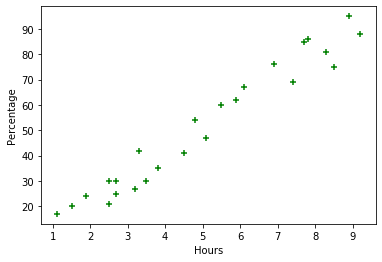

In [5]:
# Plotting Data

plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.scatter(df.Hours, df.Scores, color='green', marker='+')

From the above plot, The Data follows a positive linear regression

# Plotting barplot for the above data

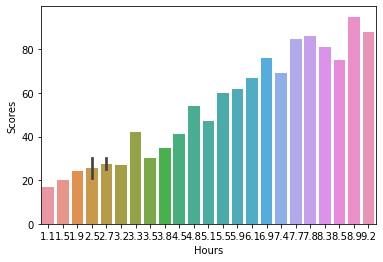

In [6]:
sns.barplot(x='Hours', y='Scores', data=df)

# Creating JointPlot

c:\users\kirti nandan joshi\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


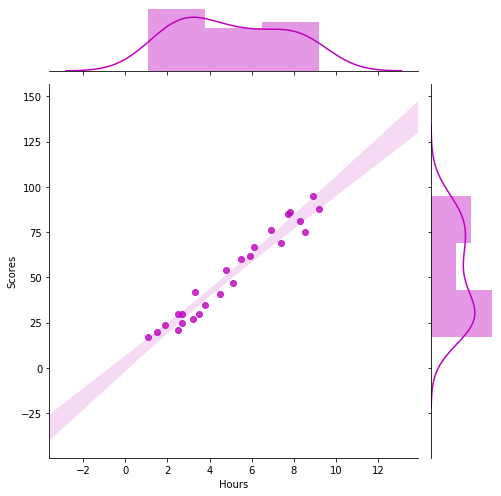

In [7]:
sns.jointplot(x='Hours', y='Scores', data=df, kind='reg', truncate=False,
                  color="m", height=7)

# Creating DistPlot

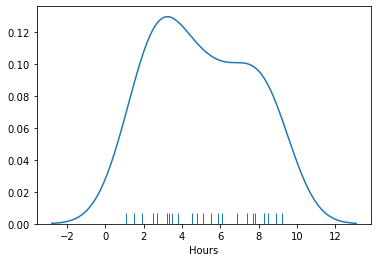

In [8]:
sns.distplot(df.Hours, rug=True, hist=False)

In [9]:
# Importing Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
# Making array

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [11]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [13]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

# Training the Algorithm

In [15]:
# Creating the obj
reg = LinearRegression()  
reg.fit(X_train, y_train)

print('Finished Training The Model')

Finished Training The Model


In [16]:
## Getting coef and intercept

m = reg.coef_

In [17]:
c = reg.intercept_

## Plotting the X, y

In [18]:
# Creating the Equation
'''
Equation -> y = m * x + c
           -> y = To Predict
           -> m = Slope
           -> c = Intercept
'''
percentage = m * X + c

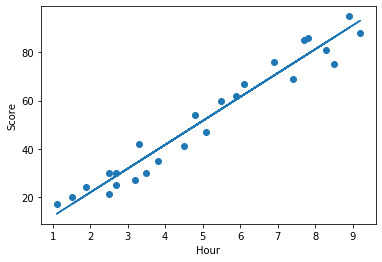

In [19]:
plt.scatter(X, y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.plot(X, percentage)
plt.show()

## Predicting the X_test values

In [21]:
print(X_test) # test data
y_score = reg.predict(X_test) # predict score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing the actual and Predicted value

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_score})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Plotting Actual and Predicted Marks

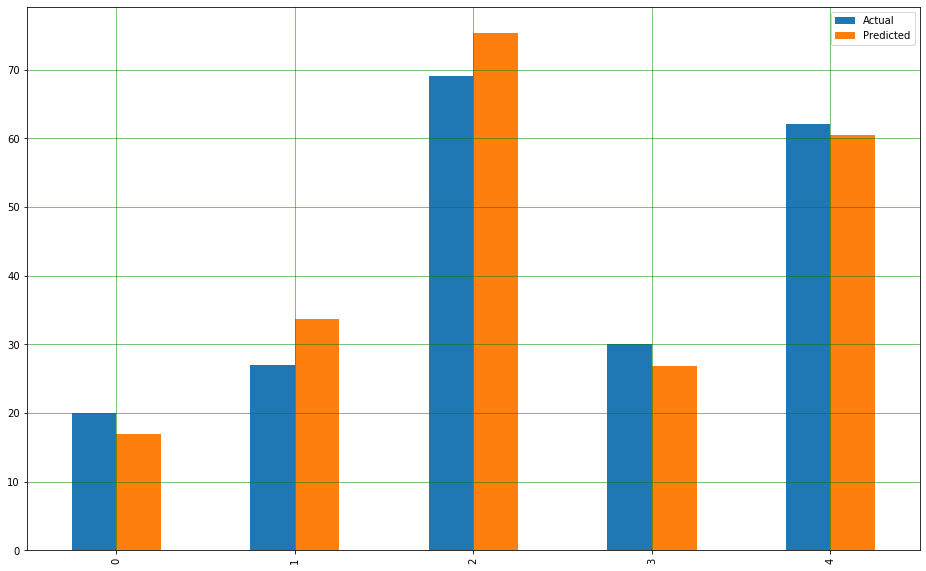

In [34]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Scatter Plot for y_test and y_score

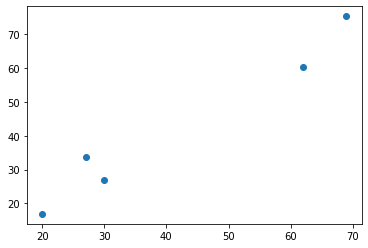

In [24]:
plt.scatter(y_test, y_score)

## Predicting the Values

In [32]:
mks = reg.predict(np.array(9.50).reshape(-1,1)).round(2)

if mks <= 100:
    print(f'You will Score {mks} marks')

You will Score [96.17] marks


# MAE:

It Stands for Mean Absolute Error

### Formula : 

1/n * sum(y - y1)

Where,
    1/n = Total number of data point
    y = actual value
    y1 = predicted vale

In [37]:
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_score))

Mean Absolute Error: 4.183859899002975
